# Lab1: Linear Regression

#### Proof of Regression Line:

    1- Least Squares Regression Line (Best line) 
    2- Predictive Error
    3- Loss (Total Predictive Error)
    4- Drivative (Loss) = 0 --> B0, B1
    
   Deriving the least squares estimators of the slope and intercept  [Simple Linear Regression](https://www.youtube.com/watch?v=ewnc1cXJmGA/ "With a title")

## Predicting House Value: Boston dataset
In this lab we are going to use a dataset called Boston. It records the median value of houses for 506 neighborhoods around Boston. Our task is to predict the median house value.

#### 1. Load these necessary libraries for this lab (install them if needed).

In [70]:
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Run the following line to obtain the matplotlib figures in the notebook
%matplotlib inline

# We also use sklearn but we will load the necessary modules we needed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#### 2. Load the Boston Dataset.

The dataset is available in scikit-learn. Notice that the format/approach is not the same. You are free to use any of them, it is up to you to adapt your codes correctly.
This dataset is removed from scikit_learn version 1.2. If you want to use it you can install the earlier version 

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

#### 3. Print the value of the boston_dataset to understand what it contains.

In [3]:
# Boston1_features = Boston1.values[:,:-1]
# Boston1_target = Boston1.values[:,-1]

In [7]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

data: contains the information for various houses <br>
target: prices of the house <br>
feature_names: names of the features <br>
DESCR: describes the dataset

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the median value of houses in a district.

In [12]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [13]:
boston['MEDV'] = boston_dataset.target

### Data preprocessing

#### 4. Check if there are any missing values in the data. After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull().

In [14]:
boston.isnull().sum().sum()

0

In [15]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
boston.isnull().values.any()

False

In [17]:
boston.dropna().shape == boston.shape

True

In [18]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

#### 5. Plot the distribution of the target variable MEDV. You can use the distplot() function from the seaborn library.

Text(0.5, 1.0, 'Distribution of the target value')

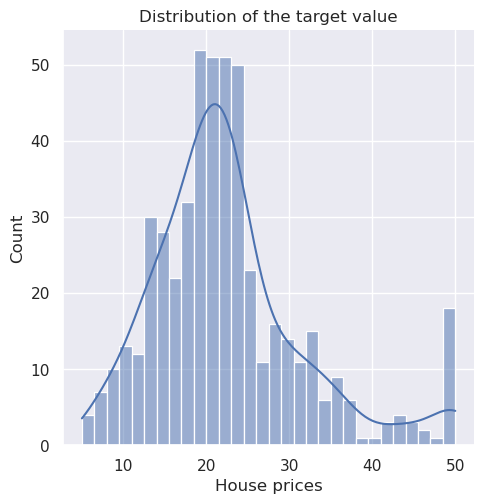

In [32]:
sns.set(rc={'figure.figsize':(12,9)})
sns.displot(boston['MEDV'], kde=True, bins=30)
plt.xlabel("House prices")
plt.title("Distribution of the target value")

We can see from the plot that the values of MEDV are distributed normally with few outliers. Most of the house are around 20-25 range. We can demonstrate outliers with boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fec1cd524f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec1cd522b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fec1cd52f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fec1cd1a460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fec1cd1ab50>],
 'means': []}

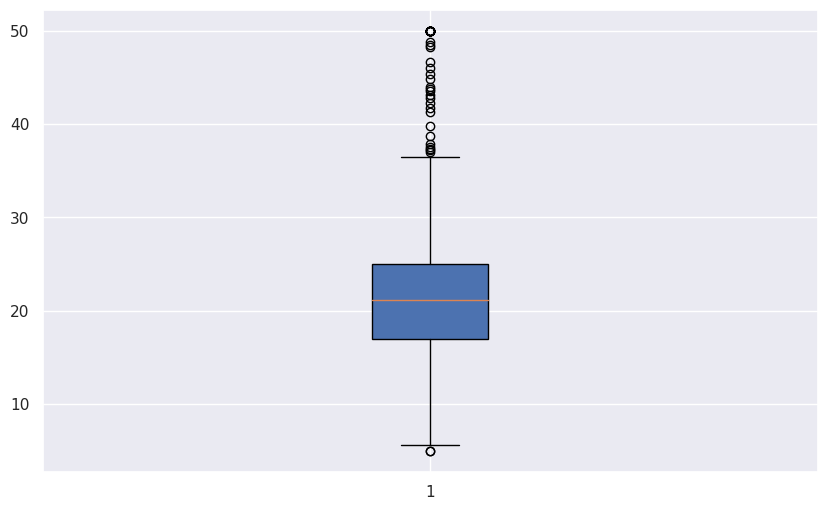

In [33]:
sns.set(rc={'figure.figsize':(10,6)})
plt.boxplot(boston['MEDV'], patch_artist=True)

#### 6. Calculate the correlation matrix and visualize it (you may use heatmap() from seaborn library). Name the features that are highly correlated with the target variable.

In [34]:
Boston_corr = boston.corr(method="pearson")
Boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

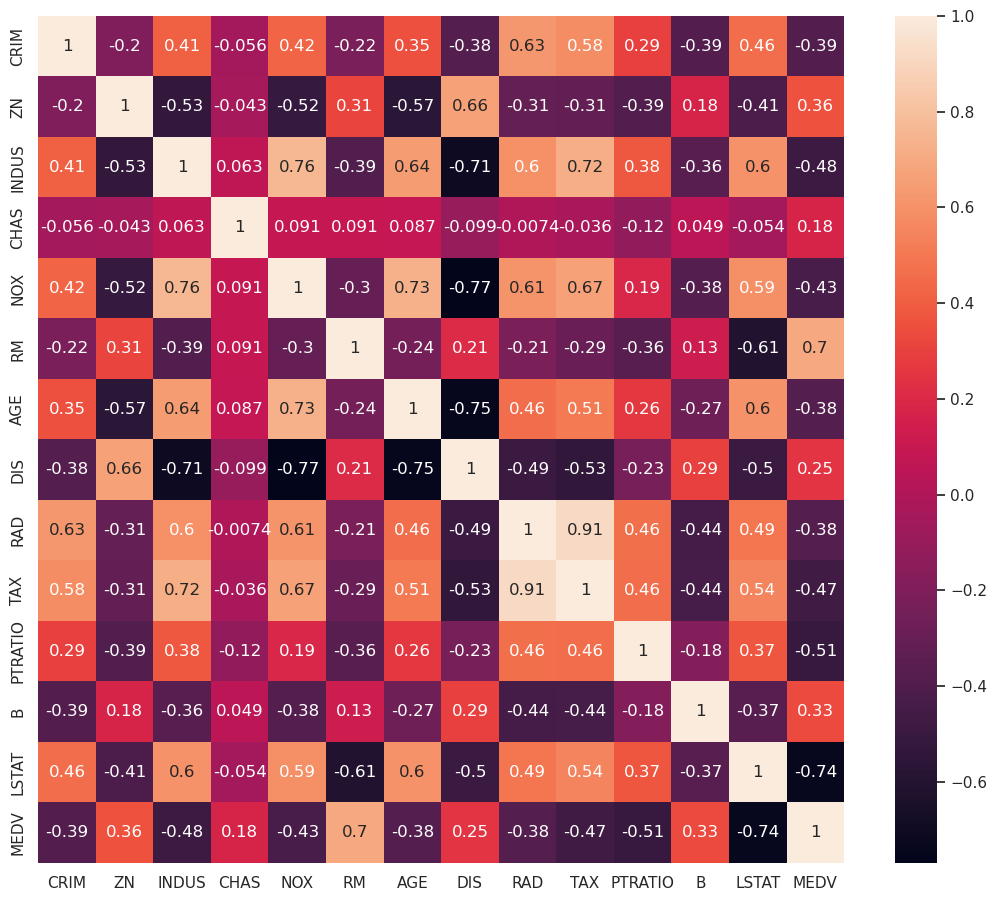

In [42]:
sns.set(rc={'figure.figsize':(13,11)})
sns.heatmap(data=Boston_corr, annot=True)
# annot = True to print the values inside the square

In [35]:
Boston_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

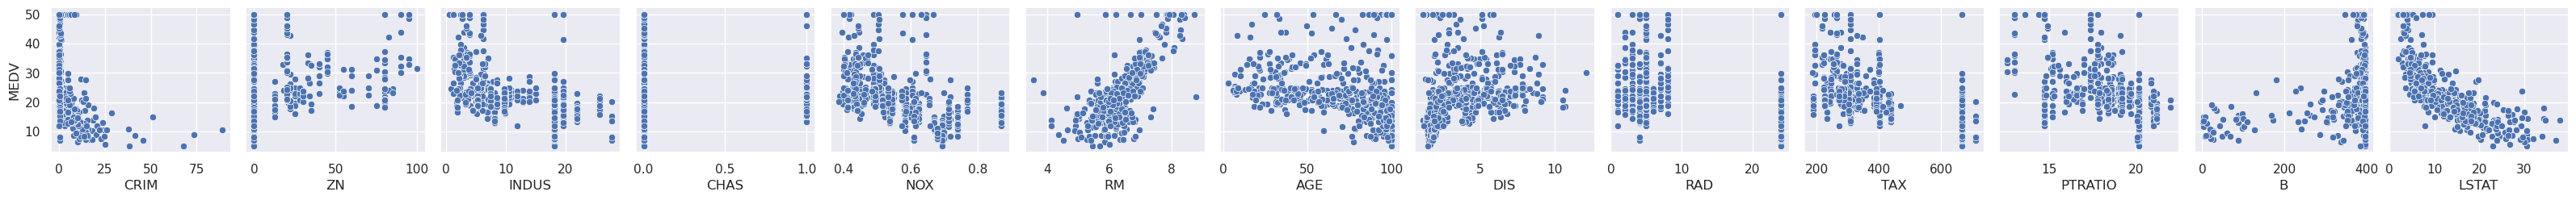

In [43]:
sns.pairplot(boston, y_vars=["MEDV"], x_vars=list(boston.keys()[:-1]))

1. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. In Boston dataset, two features (RM and LSTAT) are most correlated features with target. The Correlation between RM and target equals 0.7 and the correlation between LSTAT and target is -0.74.<br>
The features that are highly correlated with the target variable are RM and LSTAT where:

    - RM has a strong positive correlation with MEDV (0.7) and
    - LSTAT has a high negative correlation with MEDV(-0.74).

#### 7. Check for multi-colinearity between the features. More specifically RAD and TAX.

An important point in selecting features for a linear regression model is to check for multicolinearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model and we should not select colinear features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75. More explanation about multicolinearity [here.](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150)

It is not great to have colinearities between your features as it will make harder the interpretation of which feature is important and which one is not. Although I don’t believe it will harm your final estimate that much. In a extreme case it can make the matrix hard / impossible to invert. It will also lower the p-value of the two colinear column which may lead to not selecting them. “Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors”

Text(0.5, 1.0, 'Correlation RAD - TAX : 0.91')

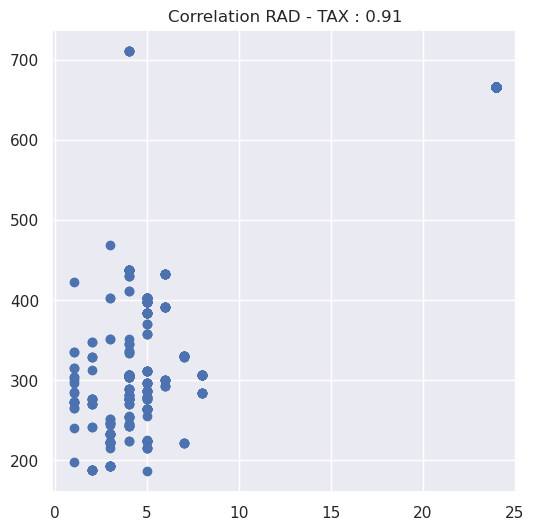

In [44]:
sns.set(rc={'figure.figsize':(6,6)})
plt.scatter(boston['RAD'], boston['TAX'])
plt.title(f"Correlation RAD - TAX : {Boston_corr['RAD']['TAX']:.2f}" )

Text(0.5, 1.0, 'High correlations in features')

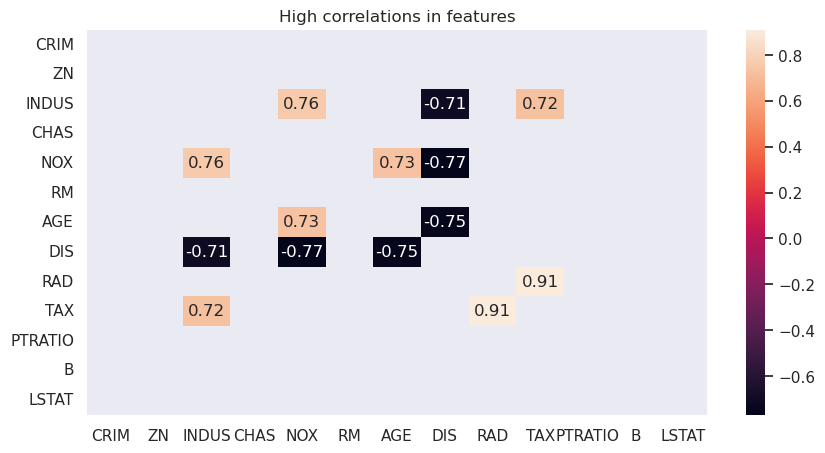

In [45]:
ncorr = Boston_corr.drop('MEDV', axis=0).drop('MEDV', axis=1)
np.fill_diagonal(ncorr.values, 0)
ncorr[(ncorr < 0.7) & (ncorr > -0.7)] = None

plt.figure(figsize=(10,5))
sns.heatmap(ncorr, annot=True)
plt.title('High correlations in features')
# plt.show()

As we can see we have other quite high colinearity between features but RAD-TAX is the highest.

#### 8. Split the data into training and testing sets.
Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. Here is how the procedure works:

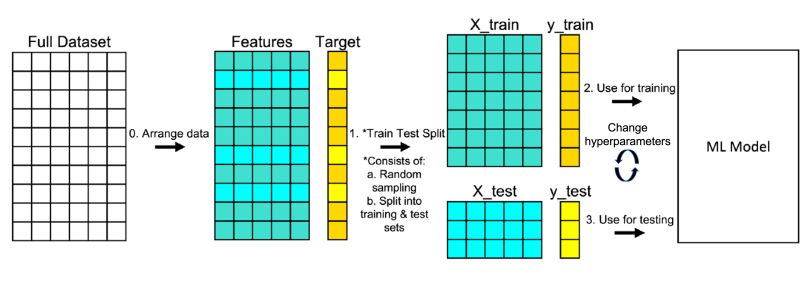

We are going to train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.

In [46]:
X = boston.loc[:, boston.columns != 'MEDV']
Y = boston['MEDV']

In [56]:
# Use train_test_split() function provided by scikit-learn library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# random_state controls the shuffling applied to the data before applying the split.

In [59]:
# print the shapes to verify if the splitting has occured properly
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Simple Linear Regression model
In this part, we are going to build a simple linear regression model. We will choose LSTAT as a feature.

#### 9. Plot MEDV in function of LSTAT.

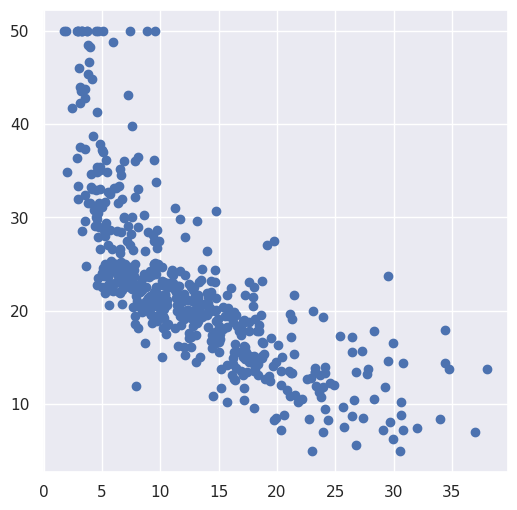

In [60]:
X_LSTAT = boston["LSTAT"]
Y_Price = boston['MEDV']
plt.scatter(X_LSTAT, Y_Price, marker='o')
# rcParams['figure.figsize'] = 11, 11

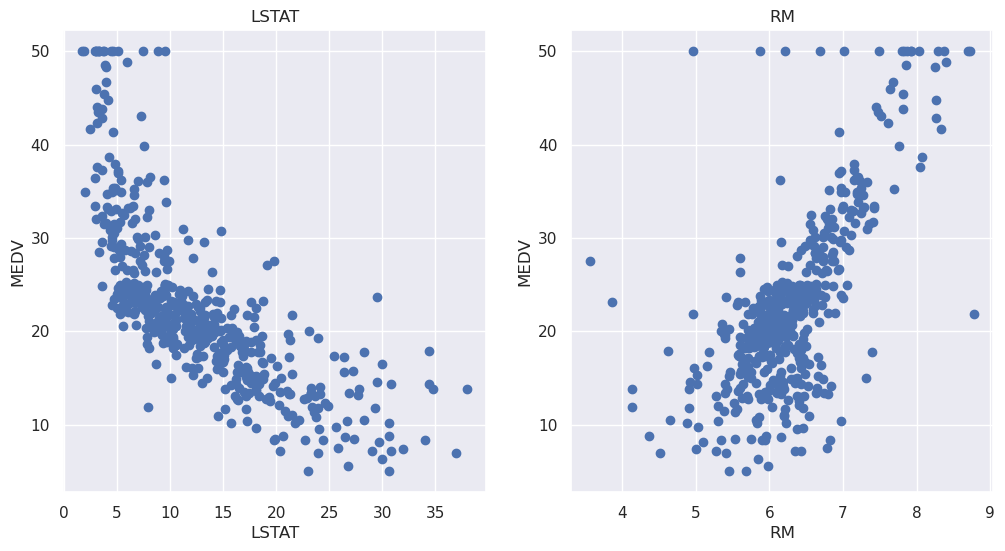

In [61]:
plt.figure(figsize=(12, 6))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### 10. Fit a simple regression model using LinearRegression() from sklearn.linear_model.

In [63]:
X_train_1 = X_train[['LSTAT']] # Select LSTAT only
X_test_1 = X_test[['LSTAT']] # Select LSTAT only

In [64]:
# X_LSTAT = np.array(X_LSTAT).reshape(-1,1)
# Y_Price = np.array(Y_Price).reshape(-1,1)

# print(X_LSTAT.shape)
# print(Y_Price.shape)

In [65]:
# X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_LSTAT, Y_Price, test_size = 0.2, random_state=5)

In [66]:
# print(X_train_1.shape)
# print(X_test_1.shape)
# print(Y_train_1.shape)
# print(Y_test_1.shape)

In [74]:
reg_1 = LinearRegression(fit_intercept=True)
reg_1.fit(X_train_1, Y_train)

LinearRegression()

#### 11. The LinearRegression() module from scikit-learn does not provide a statistical summary of the regression model. To obtain this summary, re-fit a model using ols() from statsmodels. Analyse the p-value from the summary and interpret.
Statsmodels is a popular library in Python that enables us to estimate and analyze various statistical models. It is built on numeric and scientific libraries like NumPy and SciPy. It is a python module that provides classes & functions for the estimation of many different statistical models.

In [75]:
model_1 = sm.OLS(Y_train, sm.add_constant(X_train_1)).fit()
print_model_1 = model_1.summary()
print(print_model_1)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     495.9
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.76e-72
Time:                        15:28:31   Log-Likelihood:                -1310.5
No. Observations:                 404   AIC:                             2625.
Df Residuals:                     402   BIC:                             2633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8729      0.630     55.341      0.0

What is difference between Ols and MSE? I was thinking they are the same but they are not comparable mse is a metric however ols is a model? am I right? how about gls or wls? so instead of sikitlearn it is better to use statsmodels? I mean the method they are useing is the same?
https://stackoverflow.com/questions/54614157/scikit-learn-statsmodels-which-r-squared-is-correct

## Analyis P-value:

#### 12. Plot the regression model.

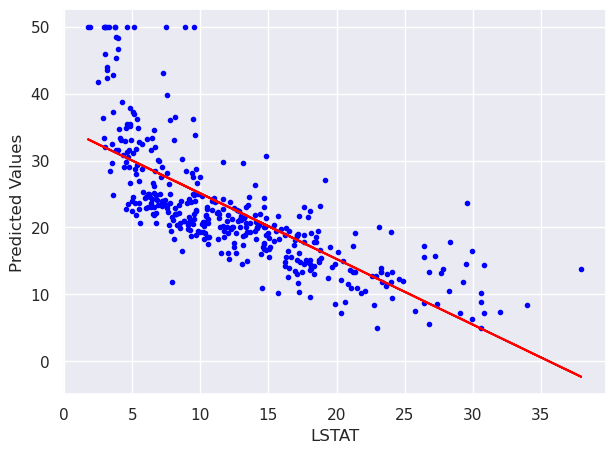

In [79]:
# extract intercept b and slope m
b_1, m_1 = model_1.params
# plot the results
plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.scatter(X_train_1, Y_train, marker ='.', color = 'blue')
ax.plot(X_train_1, m_1*X_train_1 + b_1, color ='red')
plt.xlabel('LSTAT')
plt.ylabel('Predicted Values')
plt.show()

### Model evaluation

#### 13. Evaluate the model using MSE (Mean Squarred Error) and R2-score.

In [86]:
# model evaluation for training set (RMSE)
y_train_predict = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = round(reg_1.score(X_train_1, Y_train),4)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is = {:0.4f}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is = 6.2015
R2 score is 0.5523


In [87]:
# model evaluation for test set

y_test_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test),4)

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error = {:0.4f}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for testing set
--------------------------------------
Root Mean Squared Error = 6.2307
R^2: 0.5042




#### 14. According to the plot in question 9, the relationship between LSTAT and MEDV is not linear. Let’s try a transformation of our explanatory variable LSTAT. Re-do the steps from 9 to 13 but using the log of LSTAT. Do you obtain a better model?

Text(0, 0.5, 'MEDV')

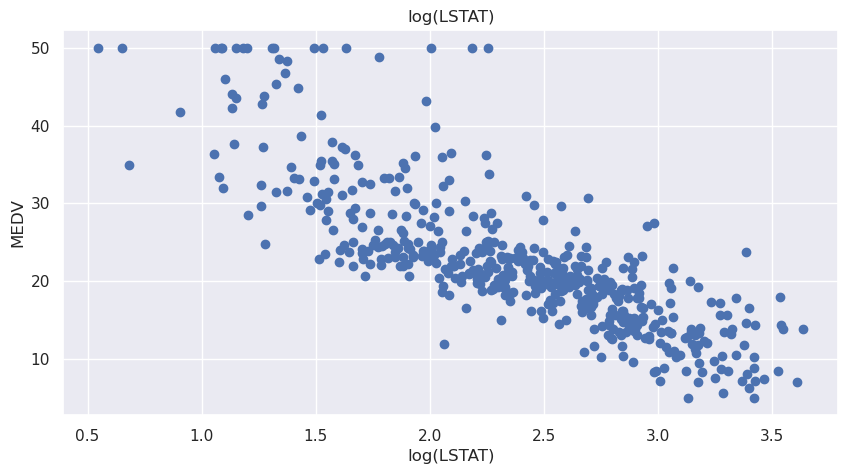

In [88]:
plt.figure(figsize=(10, 5))
X_log_LSTAT =  np.log(boston['LSTAT'])
Y_Price = boston['MEDV']
plt.scatter(X_log_LSTAT, Y_Price, marker='o')
plt.title('log(LSTAT)')
plt.xlabel('log(LSTAT)')
plt.ylabel('MEDV')

# Q: can we do any thing to our data, and just in the end we should reverse it?
# Q2 : how about target can we do convert target too?

In [103]:
Xlog_train_1 = np.log(X_train_1[['LSTAT']]) # Select LSTAT only
Xlog_test_1 = np.log(X_test_1[['LSTAT']]) # Select LSTAT only

reg_2 = LinearRegression(fit_intercept=True)
reg_2.fit(Xlog_train_1, Y_train)

# train error (MSE)

LinearRegression()

In [112]:
y_train_predict =  reg_2.predict(Xlog_train_1)
mse_train = mean_squared_error(Y_train, y_train_predict)

print("The model performance for training set")
print('MSE is {}'.format(mse_train))


# test error

The model performance for training set
MSE is 28.394194828622837


In [113]:
y_test_predict = reg2.predict(Xlog_test_1)
mse_test = mean_squared_error(Y_test, y_test_predict)
# r2 = r2_score(Y_test, y_test_predict)
r2 = round(reg2.score(Xlog_test_1, Y_test),4)

print("The model performance for testing set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2))

The model performance for testing set
MSE is 27.89954407782523
R2 score is 0.6437


We do obtain a better model, interestingly we can visualise that the model is representing a non linear relationship between the variable and the output thanks to this trick.

In [114]:
model_2 = sm.OLS(Y_train, sm.add_constant(Xlog_train_1)).fit()
print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     814.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.12e-98
Time:                        17:14:02   Log-Likelihood:                -1249.2
No. Observations:                 404   AIC:                             2502.
Df Residuals:                     402   BIC:                             2510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2893      1.072     48.763      0.0

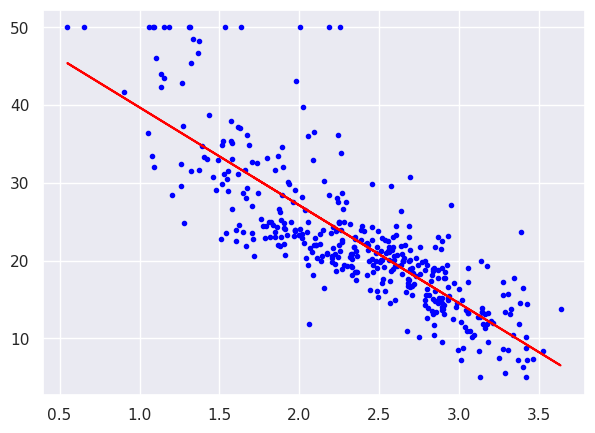

In [115]:
# extract intercept b and slope m
b_2, m_2 = model_2.params
# plot the results
plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.scatter(Xlog_train_1, Y_train, marker ='.', color = 'blue')
ax.plot(Xlog_train_1, m_2*Xlog_train_1 + b_2, color ='red')

In [116]:
# model evaluation for training set (MSE)
y_train_predict_2 = reg_2.predict(Xlog_train_1)
rmse_log = (np.sqrt(mean_squared_error(Y_train, y_train_predict_2)))
r2_log = round(reg_2.score(Xlog_train_1, Y_train),4)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is={:0.4f}'.format(rmse_log))
print('R2 score is {}'.format(r2_log))

The model performance for training set
--------------------------------------
RMSE is=5.3286
R2 score is 0.6695


In [117]:
# model evaluation for test set

y_test_pred_2 = reg_2.predict(Xlog_test_1)
rmse_log_test = (np.sqrt(mean_squared_error(Y_test, y_test_pred_2)))
r2_log_test = round(reg_2.score(Xlog_test_1, Y_test),4)

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error={:0.4f}".format(rmse_log_test))
print("R^2: {}".format(r2_log_test))
print("\n")

The model performance for testing set
--------------------------------------
Root Mean Squared Error=5.2820
R^2: 0.6437




Text(0, 0.5, 'Predicted Values')

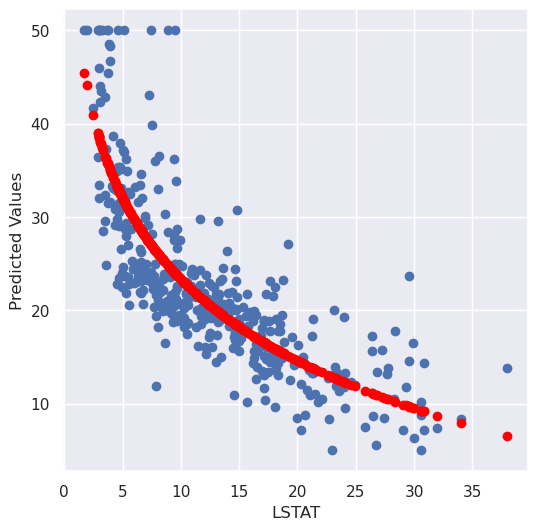

In [118]:
plt.scatter(X_train_1, Y_train)
plt.scatter(X_train_1, reg_2.predict(Xlog_train_1), c='red')
plt.xlabel('LSTAT')
plt.ylabel('Predicted Values')
# plt.show()

We do obtain a better model, interestingly we can visualise that the model is representing a non linear relationship between the variable and the output thanks to this trick.

# Compare X_lstat with X_log_lstat results:

### Multiple Linear Regression model

### 15. Train a new model using all the variables of the dataset. Evalute the performance of the model.

In [46]:
X_train_d = sm.add_constant(X_train_0)
model = sm.OLS(Y_train_0,X_train_d)
results = model.fit()
print(results.summary())

mse_test = mean_squared_error(Y_test_0, y_test_predict)
r2 = r2_score(Y_test_0, y_test_predict)

print("The model performance for testing set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     84.65
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.21e-105
Time:                        07:04:27   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9125      5.775      6.565      0.0

### 16. Which features are significant for the model?

The ones with p-values is less than the error we fix (let’s say 5%). AGE for example.

### 17. Apply backward selection to fit a model with the best subset of features.

In [47]:
columns_to_drop = ['AGE']
X_train_bck = X_train_0.drop(columns_to_drop, axis=1)
X_test_bck = X_test_0.drop(columns_to_drop, axis=1)


model = sm.OLS(Y_train_0,sm.add_constant(X_train_bck))
results = model.fit()
print(results.summary())

mse_test = mean_squared_error(Y_test_0, y_test_predict)
r2 = r2_score(Y_test_0, y_test_predict)

print("The model performance for testing set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     91.94
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.39e-106
Time:                        07:04:30   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2430.
Df Residuals:                     391   BIC:                             2482.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8841      5.756      6.582      0.0

In [98]:
columns_to_drop = ['INDUS']
X_train_bck = X_train_0.drop(columns_to_drop, axis=1)
X_test_bck = X_test_0.drop(columns_to_drop, axis=1)

model = sm.OLS(Y_train_0,sm.add_constant(X_train_bck))
results = model.fit()
print(results.summary())

mse_test = mean_squared_error(Y_test_0, y_test_predict)
r2 = r2_score(Y_test_0, y_test_predict)

print("The model performance for testing set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     91.94
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          8.37e-106
Time:                        17:42:30   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2430.
Df Residuals:                     391   BIC:                             2482.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9074      5.758      6.584      0.0

In [48]:
from sklearn.metrics import r2_score
y_test_predict = results.predict(sm.add_constant(X_test_bck))
mse_test = mean_squared_error(Y_test_0, y_test_predict)
r2 = r2_score(Y_test_0, y_test_predict)

print("The model performance for testing set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2))

The model performance for testing set
MSE is 20.869437149732175
R2 score is 0.7334473631831896


### 18. Is the new model better than the last one with all the features?

### 19. In the last model we didn’t transform LSTAT. Re train the model using log(LSTAT) instead of LSTAT. Does this new model performs better?

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
Boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
Boston_data = np.hstack([Boston.values[::2, :], Boston.values[1::2, :2]])
Boston_target = Boston.values[1::2, 2]

In [ ]:
Boston1_features.shape

In [ ]:
Boston_data.shape

In [ ]:
Boston.shape

In [ ]:
Boston.dropna().shape

In [ ]:
diamonds

In [ ]:
def SS(X):
    return sum(map(lambda item: item**2, X)) - (sum(X)**2 / len(X))
def corr(X, Y):
    X_bar = sum(X)/len(X)
    Y_bar = sum(X)/len(Y)
    
    SS_x = SS(X)
    SS_y = SS(Y)

    SP_xy = sum(map(lambda x: x[0]*x[1], zip(X, Y))) - (sum(X)*sum(Y))/len(X)
    
    return SP_xy / (SS_x * SS_y) ** 0.5

In [ ]:
x = Boston1.values[1,:]
y = Boston1.values[2,:]

In [ ]:
# np.corrcoef(x)
from scipy.stats.stats import pearsonr

In [ ]:
pearsonr(x,y)

In [ ]:
corr(x, y)